<a href="https://colab.research.google.com/github/rezamohammadloo/cats-dogs-classifier-using-cnn/blob/main/CatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#getting data
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
#unzipping data
import zipfile

zip_file=zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", 'r')
zip_file.extractall()

zip_file.close()

In [ ]:
import os
print('total training cat images :', len(os.listdir( "/content/cats_and_dogs_filtered/train/cats") ))
print('total training dog images :', len(os.listdir("/content/cats_and_dogs_filtered/train/dogs") ))

print('total validation cat images :', len(os.listdir("/content/cats_and_dogs_filtered/validation/cats") ))
print('total validation dog images :', len(os.listdir( "/content/cats_and_dogs_filtered/validation/dogs") ))

In [ ]:
#using image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory("/content/cats_and_dogs_filtered/train",
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  test_datagen.flow_from_directory("/content/cats_and_dogs_filtered/validation",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

In [ ]:
#building our CNN
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compiling net with RMSprop and binary crossentropy
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Text(0.5, 1.0, 'Training and validation loss')

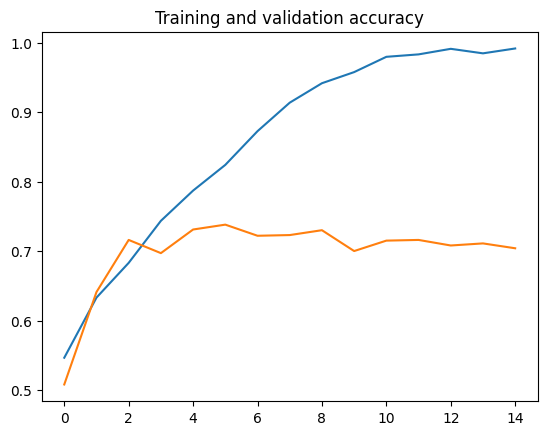

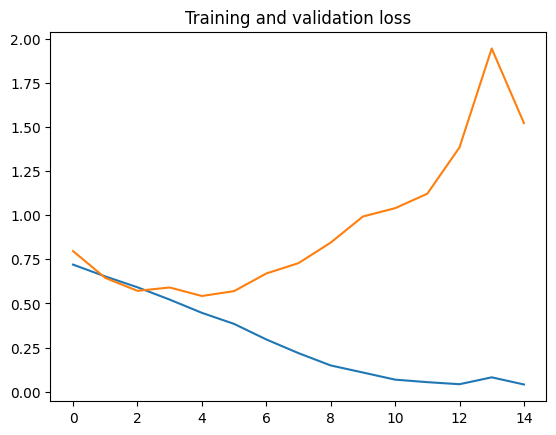

In [ ]:
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Getting the number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

obviously we have overfitting problem!

In [8]:
#tackling the issue using data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "/content/cats_and_dogs_filtered/train",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        "/content/cats_and_dogs_filtered/validation",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
#compiling
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

In [13]:
# Train the new model
history_with_aug = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 95s - loss: 0.6969 - accuracy: 0.5270 - val_loss: 0.6785 - val_accuracy: 0.5640 - 95s/epoch - 952ms/step
Epoch 2/15
100/100 - 89s - loss: 0.6849 - accuracy: 0.5500 - val_loss: 0.6679 - val_accuracy: 0.5670 - 89s/epoch - 888ms/step
Epoch 3/15
100/100 - 80s - loss: 0.6750 - accuracy: 0.5730 - val_loss: 0.6464 - val_accuracy: 0.6430 - 80s/epoch - 797ms/step
Epoch 4/15
100/100 - 74s - loss: 0.6638 - accuracy: 0.5905 - val_loss: 0.6524 - val_accuracy: 0.5820 - 74s/epoch - 739ms/step
Epoch 5/15
100/100 - 82s - loss: 0.6568 - accuracy: 0.6150 - val_loss: 0.6635 - val_accuracy: 0.5730 - 82s/epoch - 821ms/step
Epoch 6/15
100/100 - 74s - loss: 0.6540 - accuracy: 0.6070 - val_loss: 0.6831 - val_accuracy: 0.5480 - 74s/epoch - 735ms/step
Epoch 7/15
100/100 - 79s - loss: 0.6448 - accuracy: 0.6170 - val_loss: 0.6132 - val_accuracy: 0.6570 - 79s/epoch - 786ms/step
Epoch 8/15
100/100 - 84s - loss: 0.6395 - accuracy: 0.6230 - val_loss: 0.5987 - val_accuracy: 0.6830 - 84s/epoch - 843

Text(0.5, 1.0, 'Training and validation loss with augmentation ')

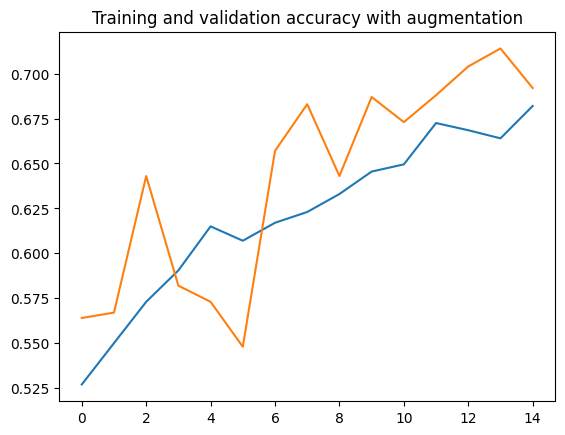

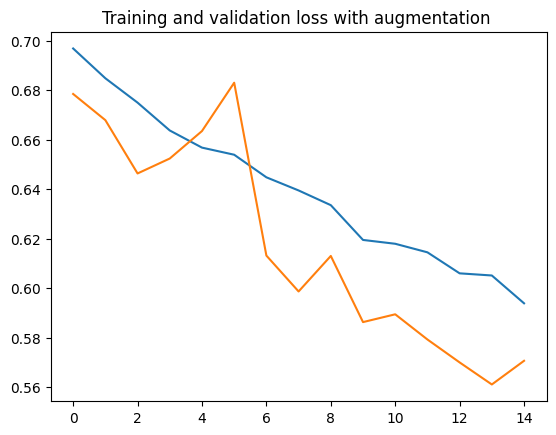

In [14]:
import matplotlib.pyplot as plt

acc      = history_with_aug.history[     'accuracy' ]
val_acc  = history_with_aug.history[ 'val_accuracy' ]
loss     = history_with_aug.history[    'loss' ]
val_loss = history_with_aug.history['val_loss' ]

epochs   = range(len(acc)) # Getting the number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy with augmentation')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss with augmentation '  )

got fixed, but we need to traing our model for a longer time period to get a better result.